In [1]:
from corrfunc_helper import twoPointCFs as mycf

Read in LSS QSO catalogs

In [2]:
data = Table.read('../../../data/lss/eBOSS_QSO/eBOSS_QSO.fits')
rand = Table.read('../../../data/lss/eBOSS_QSO/eBOSS_QSO_randoms.fits')

Define coordinates, 3 tuple of RA, DEC, comoving distance

In [3]:
coords = (data['RA'], data['DEC'], data['CHI'])
randcoords = (rand['RA'], rand['DEC'], rand['CHI'])

Define projected radius bins, and maximum pi to integrate to

In [4]:
# bins of projected radius from 1 to 125 Mpc/h
rp_bins = np.logspace(0, 2.1, 50)
pimax = 40 # Mpc/h

Evaluate correlation function 

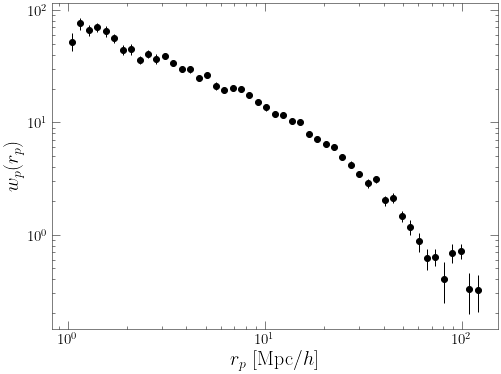

In [5]:
cf = mycf.autocorr_from_coords(rp_bins, coords, randcoords, weights=data['weight'], 
                               randweights=rand['weight'],
                               estimator='Peebles', 
                               pimax=pimax, 
                               nbootstrap=500)
cf['plot']

Covariance matrix

/tmp/ipykernel_344096/1640777306.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(cf['wp_covar']))


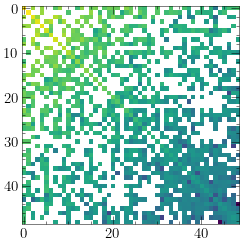

In [16]:
plt.imshow(np.log10(cf['wp_covar']))

Also calculate 2D clustering and plot (equal number of linear rp and pi bins)

/home/graysonpetter/ssd/Dartmouth/common_tools/Corrfunc_Helper/corrfunc_helper/plots.py:46: RuntimeWarning: invalid value encountered in log10
  logxi = np.log10(cf2d)


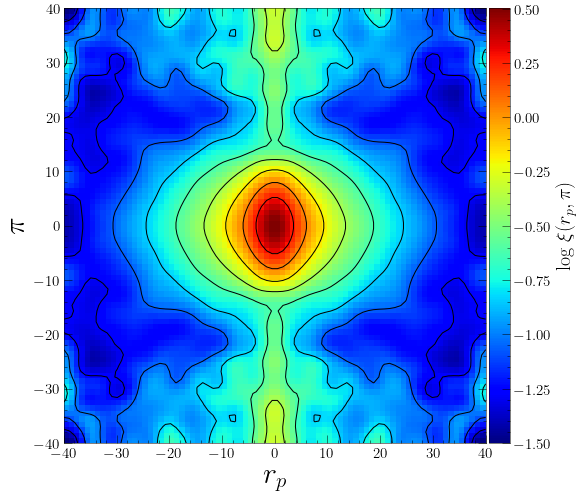

In [6]:
scales = np.linspace(0.1, pimax, int(pimax)+1)
cf = mycf.autocorr_from_coords(coords=coords, randcoords=randcoords, scales=scales, 
                            weights=data['weight'], randweights=rand['weight'],
                            estimator='Peebles', pimax=pimax, nbootstrap=500)
cf['2dplot']

Calculate angular clustering by omitting distances

In [8]:
coords = (data['RA'], data['DEC'])
randcoords = (rand['RA'], rand['DEC'])

In [9]:
# angular bins from 10^-2 to 1 degrees
theta_bins = np.logspace(-2, 0, 50)

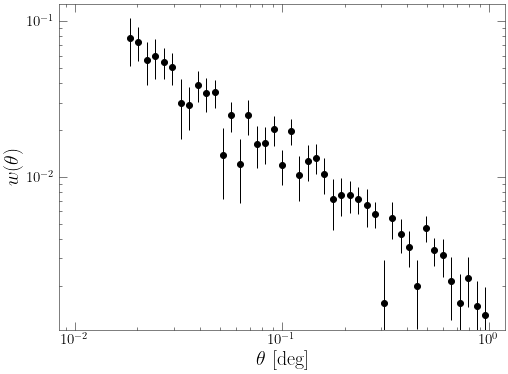

In [10]:
cf = mycf.autocorr_from_coords(coords=coords, randcoords=randcoords, scales=theta_bins, 
                               weights=data['weight'], randweights=rand['weight'],
                               estimator='Peebles', pimax=pimax, nbootstrap=500)
cf['plot']

Cross correlation (using same sample twice here for demonstration)

In [11]:
coords1 = (data['RA'], data['DEC'], data['CHI'])
randcoords1 = (rand['RA'], rand['DEC'], rand['CHI'])
coords2 = coords1
randcoords2 = randcoords1

Evaluate correlation function 

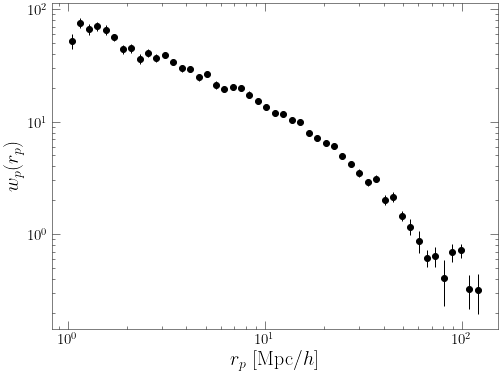

In [12]:
xcf = mycf.crosscorr_from_coords(scales=rp_bins, coords1=coords1, randcoords1=randcoords1, 
                            coords2=coords2, randcoords2=randcoords2,
                            weights1=data['weight'], randweights1=rand['weight'],
                            weights2=data['weight'], randweights2=rand['weight'],
                            estimator='Peebles', pimax=pimax, nbootstrap=500)
xcf['plot']